<a href="https://colab.research.google.com/github/Delcapa/BDA_6th/blob/main/solar_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
solar = pd.read_csv('2021solar_seoul.csv', encoding = 'cp949') #cp949: 한글로 구성된 데이터 불러올때 오류 해결해줌
weather = pd.read_csv('2021weather_seoul.csv', encoding = 'cp949')

## 태양광 에너지 시간별 발전량 데이터(2018~2021년)

In [ ]:
solar.head()

,연료원,지역세부구분,거래일,시간,전력거래량(MWh)
0,태양광,서울시,2018-01-01,1,0.0
1,태양광,서울시,2018-01-01,2,0.0
2,태양광,서울시,2018-01-01,3,0.0
3,태양광,서울시,2018-01-01,4,0.0
4,태양광,서울시,2018-01-01,5,0.0


In [ ]:
solar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   연료원         35064 non-null  object 
 1   지역세부구분      35064 non-null  object 
 2   거래일         35064 non-null  object 
 3   시간          35064 non-null  int64  
 4   전력거래량(MWh)  35064 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 1.3+ MB


In [ ]:
solar.isna().sum() #결측치는 없음

연료원           0
지역세부구분        0
거래일           0
시간            0
전력거래량(MWh)    0
dtype: int64

In [ ]:
solar.columns

Index(['연료원', '지역세부구분', '거래일', '시간', '전력거래량(MWh)'], dtype='object')

In [ ]:
solar = solar[['지역세부구분', '거래일', '시간', '전력거래량(MWh)']].copy()

In [ ]:
solar.info() #데이터 용량 최소화

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   지역세부구분      35064 non-null  object 
 1   거래일         35064 non-null  object 
 2   시간          35064 non-null  int64  
 3   전력거래량(MWh)  35064 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.1+ MB


In [ ]:
solar

,지역세부구분,거래일,시간,전력거래량(MWh)
0,서울시,2018-01-01,1,0.0
1,서울시,2018-01-01,2,0.0
2,서울시,2018-01-01,3,0.0
3,서울시,2018-01-01,4,0.0
4,서울시,2018-01-01,5,0.0
...,...,...,...,...
35059,서울시,2021-12-31,20,0.0
35060,서울시,2021-12-31,21,0.0
35061,서울시,2021-12-31,22,0.0
35062,서울시,2021-12-31,23,0.0


In [ ]:
solar['Date'] = pd.to_datetime(solar['거래일'])
solar.info() # dt속성을 이용하기 위해 거래일을 datetime형태로 바꾼 것을 date열에 저장

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   지역세부구분      35064 non-null  object        
 1   거래일         35064 non-null  object        
 2   시간          35064 non-null  int64         
 3   전력거래량(MWh)  35064 non-null  float64       
 4   Date        35064 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 1.3+ MB


In [ ]:
solar['Year'] = solar['Date'].dt.year
solar['Month'] = solar['Date'].dt.month
solar['Day'] = solar['Date'].dt.day

solar.head()

,지역세부구분,거래일,시간,전력거래량(MWh),Date,Year,Month,Day
0,서울시,2018-01-01,1,0.0,2018-01-01,2018,1,1
1,서울시,2018-01-01,2,0.0,2018-01-01,2018,1,1
2,서울시,2018-01-01,3,0.0,2018-01-01,2018,1,1
3,서울시,2018-01-01,4,0.0,2018-01-01,2018,1,1
4,서울시,2018-01-01,5,0.0,2018-01-01,2018,1,1


In [ ]:
solar_after = solar.groupby(['Year','Month','Day']).agg(solar_day = ('전력거래량(MWh)','sum')).reset_index()

In [ ]:
solar_2021 = solar_after[solar_after['Year'] == 2021]
solar_2021 # 2022년 데이터만으로 전처리 완료 (시간도 정리됨)

,Year,Month,Day,solar_day
1096,2021,1,1,39.278784
1097,2021,1,2,50.582033
1098,2021,1,3,34.708302
1099,2021,1,4,31.779181
1100,2021,1,5,47.523972
...,...,...,...,...
1456,2021,12,27,23.184872
1457,2021,12,28,14.259177
1458,2021,12,29,17.772088
1459,2021,12,30,38.614533


## 일별 기상 정보 데이터(2021년)

In [ ]:
weather.head()

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C),일강수량(mm),평균 풍속(m/s),일 최심적설(cm)
0,108,서울,2021-01-01,-4.2,-9.8,1.6,NaN,2.0,NaN
1,108,서울,2021-01-02,-5.0,-8.4,-1.4,NaN,2.6,NaN
2,108,서울,2021-01-03,-5.6,-9.1,-2.0,NaN,2.0,NaN
3,108,서울,2021-01-04,-3.5,-8.4,0.3,0.0,1.7,0.0
4,108,서울,2021-01-05,-5.5,-9.9,-2.1,0.0,2.9,0.0


In [ ]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   지점          365 non-null    int64  
 1   지점명         365 non-null    object 
 2   일시          365 non-null    object 
 3   평균기온(°C)    365 non-null    float64
 4   최저기온(°C)    365 non-null    float64
 5   최고기온(°C)    365 non-null    float64
 6   일강수량(mm)    160 non-null    float64
 7   평균 풍속(m/s)  365 non-null    float64
 8   일 최심적설(cm)  27 non-null     float64
dtypes: float64(6), int64(1), object(2)
memory usage: 25.8+ KB


In [ ]:
weather.isna().sum() #일강수량과 최심적설 데이터에 결측치가 있음을 확인

지점              0
지점명             0
일시              0
평균기온(°C)        0
최저기온(°C)        0
최고기온(°C)        0
일강수량(mm)      205
평균 풍속(m/s)      0
일 최심적설(cm)    338
dtype: int64

In [ ]:
weather = weather.fillna(0) # 이 데이터셋에서 강수량과 최심적설이 결측인 것은 이러한 기후현상이 발생하지 않음. 즉 0과 마찬가지임
weather

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C),일강수량(mm),평균 풍속(m/s),일 최심적설(cm)
0,108,서울,2021-01-01,-4.2,-9.8,1.6,0.0,2.0,0.0
1,108,서울,2021-01-02,-5.0,-8.4,-1.4,0.0,2.6,0.0
2,108,서울,2021-01-03,-5.6,-9.1,-2.0,0.0,2.0,0.0
3,108,서울,2021-01-04,-3.5,-8.4,0.3,0.0,1.7,0.0
4,108,서울,2021-01-05,-5.5,-9.9,-2.1,0.0,2.9,0.0
...,...,...,...,...,...,...,...,...,...
360,108,서울,2021-12-27,-7.6,-12.9,-3.9,0.0,1.7,0.0
361,108,서울,2021-12-28,-4.1,-8.5,-0.9,0.0,2.2,0.0
362,108,서울,2021-12-29,0.4,-3.8,5.9,0.2,2.6,0.3
363,108,서울,2021-12-30,-3.9,-6.8,0.2,0.0,3.3,0.0


In [ ]:
weather.columns

Index(['지점', '지점명', '일시', '평균기온(°C)', '최저기온(°C)', '최고기온(°C)', '일강수량(mm)',
       '평균 풍속(m/s)', '일 최심적설(cm)'],
      dtype='object')

In [ ]:
weather = weather[['일시', '평균기온(°C)', '최저기온(°C)', '최고기온(°C)', '일강수량(mm)',
       '평균 풍속(m/s)', '일 최심적설(cm)']].copy() #copy()로 얕은 복사

In [ ]:
weather.info() #필요한 데이터만 남겨 용량 최소화

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   일시          365 non-null    object 
 1   평균기온(°C)    365 non-null    float64
 2   최저기온(°C)    365 non-null    float64
 3   최고기온(°C)    365 non-null    float64
 4   일강수량(mm)    365 non-null    float64
 5   평균 풍속(m/s)  365 non-null    float64
 6   일 최심적설(cm)  365 non-null    float64
dtypes: float64(6), object(1)
memory usage: 20.1+ KB


In [ ]:
weather['Date'] = pd.to_datetime(weather['일시'])
weather.info() # dt속성을 이용하기 위해 거래일을 datetime형태로 바꾼 것을 date열에 저장

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   일시          365 non-null    object        
 1   평균기온(°C)    365 non-null    float64       
 2   최저기온(°C)    365 non-null    float64       
 3   최고기온(°C)    365 non-null    float64       
 4   일강수량(mm)    365 non-null    float64       
 5   평균 풍속(m/s)  365 non-null    float64       
 6   일 최심적설(cm)  365 non-null    float64       
 7   Date        365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 22.9+ KB


In [ ]:
weather['Year'] = weather['Date'].dt.year
weather['Month'] = weather['Date'].dt.month
weather['Day'] = weather['Date'].dt.day

weather.head()

,일시,평균기온(°C),최저기온(°C),최고기온(°C),일강수량(mm),평균 풍속(m/s),일 최심적설(cm),Date,Year,Month,Day
0,2021-01-01,-4.2,-9.8,1.6,0.0,2.0,0.0,2021-01-01,2021,1,1
1,2021-01-02,-5.0,-8.4,-1.4,0.0,2.6,0.0,2021-01-02,2021,1,2
2,2021-01-03,-5.6,-9.1,-2.0,0.0,2.0,0.0,2021-01-03,2021,1,3
3,2021-01-04,-3.5,-8.4,0.3,0.0,1.7,0.0,2021-01-04,2021,1,4
4,2021-01-05,-5.5,-9.9,-2.1,0.0,2.9,0.0,2021-01-05,2021,1,5


In [ ]:
weather_2021 = weather.pivot_table(index=['Year','Month','Day']).reset_index()
weather_2021

,Year,Month,Day,일 최심적설(cm),일강수량(mm),최고기온(°C),최저기온(°C),평균 풍속(m/s),평균기온(°C)
0,2021,1,1,0.0,0.0,1.6,-9.8,2.0,-4.2
1,2021,1,2,0.0,0.0,-1.4,-8.4,2.6,-5.0
2,2021,1,3,0.0,0.0,-2.0,-9.1,2.0,-5.6
3,2021,1,4,0.0,0.0,0.3,-8.4,1.7,-3.5
4,2021,1,5,0.0,0.0,-2.1,-9.9,2.9,-5.5
...,...,...,...,...,...,...,...,...,...
360,2021,12,27,0.0,0.0,-3.9,-12.9,1.7,-7.6
361,2021,12,28,0.0,0.0,-0.9,-8.5,2.2,-4.1
362,2021,12,29,0.3,0.2,5.9,-3.8,2.6,0.4
363,2021,12,30,0.0,0.0,0.2,-6.8,3.3,-3.9


## 데이터 병합

In [ ]:
df = pd.merge(solar_2021, weather_2021, how = 'inner')
df #inner 기준으로 데이터 merge

,Year,Month,Day,solar_day,일 최심적설(cm),일강수량(mm),최고기온(°C),최저기온(°C),평균 풍속(m/s),평균기온(°C)
0,2021,1,1,39.278784,0.0,0.0,1.6,-9.8,2.0,-4.2
1,2021,1,2,50.582033,0.0,0.0,-1.4,-8.4,2.6,-5.0
2,2021,1,3,34.708302,0.0,0.0,-2.0,-9.1,2.0,-5.6
3,2021,1,4,31.779181,0.0,0.0,0.3,-8.4,1.7,-3.5
4,2021,1,5,47.523972,0.0,0.0,-2.1,-9.9,2.9,-5.5
...,...,...,...,...,...,...,...,...,...,...
360,2021,12,27,23.184872,0.0,0.0,-3.9,-12.9,1.7,-7.6
361,2021,12,28,14.259177,0.0,0.0,-0.9,-8.5,2.2,-4.1
362,2021,12,29,17.772088,0.3,0.2,5.9,-3.8,2.6,0.4
363,2021,12,30,38.614533,0.0,0.0,0.2,-6.8,3.3,-3.9


## 가설1. 강수량(혹은 적설량)이 낮을수록 발전량이 높을 것이다.

<AxesSubplot:xlabel='Year,Month'>

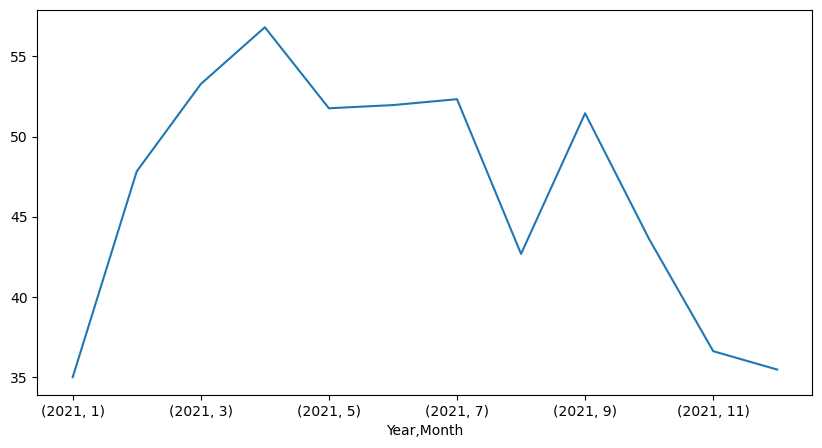

In [ ]:
df.pivot_table(index=['Year','Month'])['solar_day'].plot(figsize = (10,5))

<AxesSubplot:xlabel='Year,Month'>

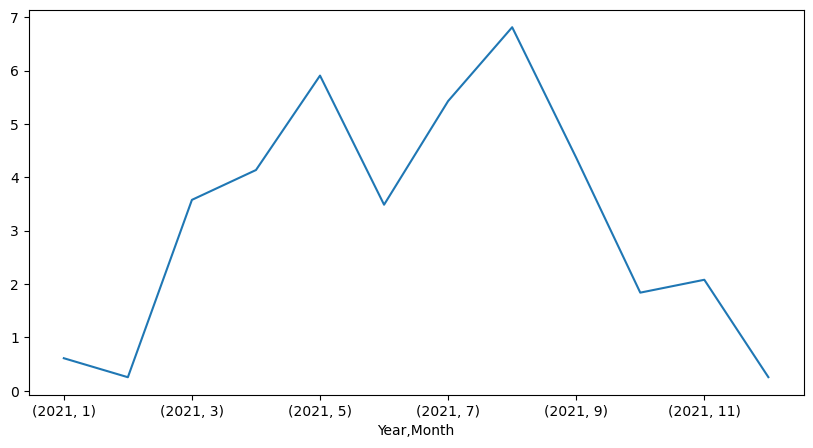

In [ ]:
df.pivot_table(index=['Year','Month'])['일강수량(mm)'].plot(figsize = (10,5))

* 강수량이 높게 나타는 5월과 8월의 경우, 실제로 발전량 그래프 또한 꺽임을 확인할 수 있다.

## 가설2. 계절별로 발전량과 관계가 있다. (여름이면 높고 겨울이면 낮다)

<AxesSubplot:xlabel='Year,Month'>

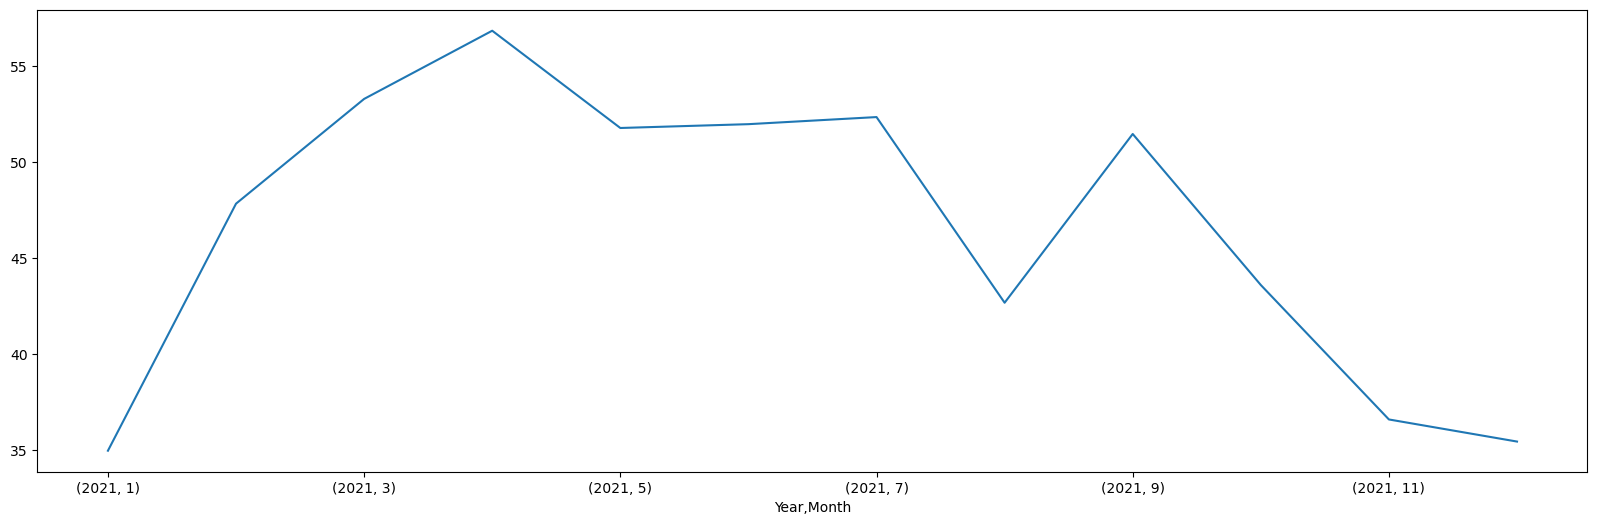

In [ ]:
df.pivot_table(index=['Year','Month'])['solar_day'].plot(figsize=(20,6))

<AxesSubplot:xlabel='Year,Month'>

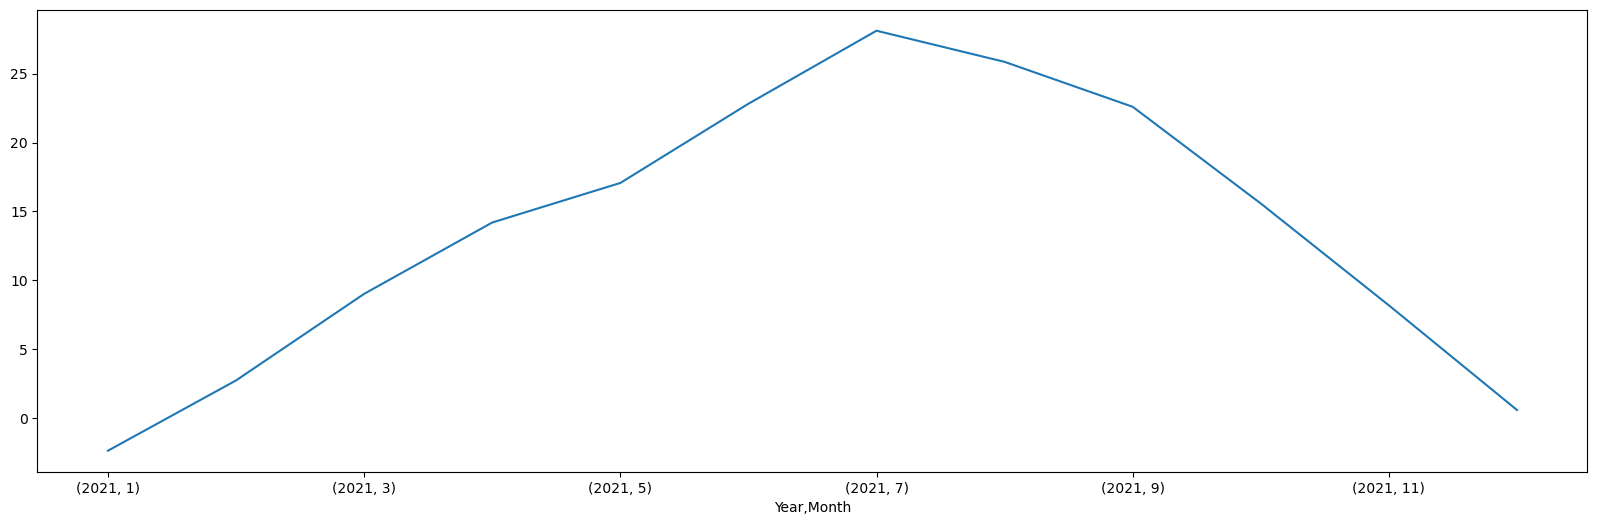

In [ ]:
df.pivot_table(index=['Year','Month'])['평균기온(°C)'].plot(figsize=(20,6))

* 기온이 낮은 1월,2월과 10월,11월, 12월에 발전량이 낮아지고 기온이 높아지기 시작하는 3월부터 9월에는 발전량이 높음을 알 수 있다